# Deep Learning Activation functions

Activation functions are an important part of the Neural Networks. They introduce non linearities that help to add more expresiveness of the Neural Networks. In vanilla networks the Sigmoid function was througholy used. However it has some problems to the speed of convergence and gradient saturation. So different activation fucntions have been proposed to speed up convergence, aliviate gradient saturation and mitigate covariate shift. In this Notebook we will explore some of the most popular alternative activation functions used in deep learning architectures.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def approximateIntegral(f, a, b, steps = 50):
    step_size = (b-a)/steps
    x = np.linspace(a, b, steps)
    y = f(x)
    return np.sum(y*step_size)

def plotFunction(x, y, ylim = 1):
    plt.plot(x,y, color='r')
    plt.xlim([x[0],x[-1]])
    plt.ylim([0, max(y) + ylim])
    plt.show()
    
def plotFunctions(title, functions, x = None, savefile=None, ylim=(0, 1.2)):
    if not x:
        x = np.linspace(-5, 5, 300)
    fig, ax = plt.subplots()
    
    legends = []
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    color_index = 0
    for f in functions:
        legends.append("y=" + f[0])
        y = f[1](x)
        if(color_index == len(colors)):
            color_index = 0
        ax.plot(x,y,color=colors[color_index], alpha=0.5)
        color_index += 1
    ax.set(xlabel='x', ylabel='y', title=title)
    plt.xlim([x[0],x[-1]])
    plt.ylim([ylim[0], ylim[1]])
    ax.legend(legends)
    plt.grid(True)
    
    if savefile:
        plt.savefig(savefile + '.png')
    plt.show()
    

## Sigmoid and derivative
$$
\sigma(x) = \frac{1}{1+ e^{-z}} \\
\sigma'(x) = \sigma(x)(1 -\sigma(x))
$$

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid(x))

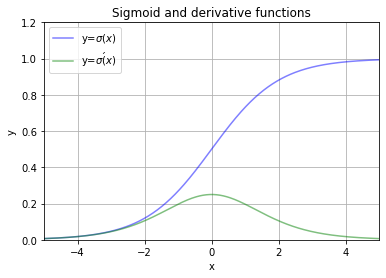

In [4]:
plotFunctions(r'Sigmoid and derivative functions', [(r'$\sigma(x)$', sigmoid), (r'$\sigma\'(x)$', sigmoid_prime)])

## Tanh and derivative
$$
tanh(x) = 2\sigma(2x) -1 = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} \\
tanh'(x) = 1 - tanh(x)^2
$$

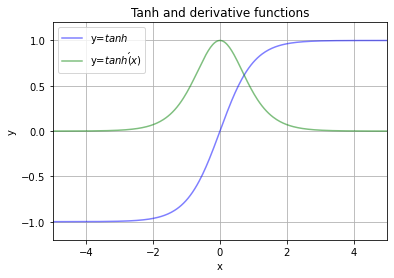

In [5]:
def tanh(x):
    return 2*sigmoid(2*x) -1

def tanh_prime(x):
    return 1 - (tanh(x))**2

plotFunctions(r'Tanh and derivative functions', [(r'$tanh$', tanh), (r'$tanh\'(x)$', tanh_prime)], ylim=(-1.2, 1.2))

## Hard Tanh

$$
hardtanh(x) = max(-1, min(1, x)) \\
hardtanh'(x) =
\begin{cases}
1 & -1 < x < 1 \\
0 & \text{otherwise}
\end{cases}
$$

In [6]:
def hardtanh(x):
    return np.maximum(-1, np.minimum(1, x))

def hardtanh_prime(x):
    out = [1 if -1 < n and n < 1 else 0 for n in x]
    return np.array(out)

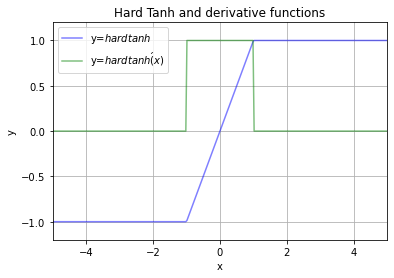

In [7]:
plotFunctions(r'Hard Tanh and derivative functions', [(r'$hard tanh$', hardtanh), (r'$hard tanh\'(x)$', hardtanh_prime)], ylim=(-1.2, 1.2))

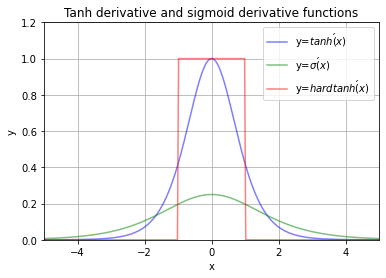

In [8]:
plotFunctions(r'Tanh derivative and sigmoid derivative functions', [(r'$tanh\'(x)$', tanh_prime), (r'$\sigma\'(x)$', sigmoid_prime), (r'$hardtanh\'(x)$', hardtanh_prime)])

## ReLU and derivative
$$
ReLU(x) = max(0, x) \\
ReLU'(x) = 
\begin{cases}
0 & x \leq 0 \\
1 & 0 < x 
\end{cases}
$$

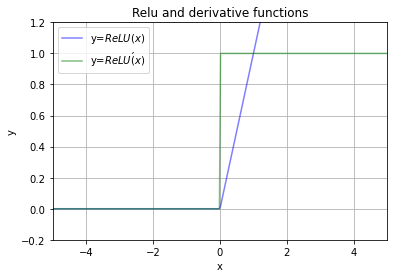

In [9]:
def relu(x):
    return np.maximum(0, x)

def relu_prime(x):
    return x >= 0

plotFunctions(r'Relu and derivative functions', [(r'$ReLU(x)$', relu), (r'$ReLU\'(x)$', relu_prime)], ylim=(-0.2, 1.2))

## Leaky ReLU

$$
LeakyReLu(x) =\begin{cases}
x \hspace{0.3em} if \hspace{0.3em}x \geq 0 \\
\alpha x \hspace{0.3em} if \hspace{0.3em}x < 0 
\end{cases} \\
LeakyReLu'(x) =\begin{cases}
1 \hspace{0.3em} if \hspace{0.3em}x \geq 0 \\
\alpha \hspace{0.3em} if \hspace{0.3em}x < 0 
\end{cases}
$$

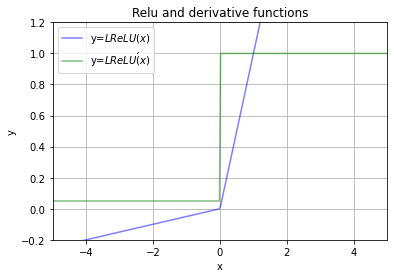

In [10]:
def leaky_relu(x, alpha=0.05):
    return np.array([a if a >= 0 else alpha*a for a in x])

def leaky_relu_prime(x, alpha=0.05):
    return np.array([1 if a >= 0 else alpha for a in x])

plotFunctions(r'Relu and derivative functions', [(r'$LReLU(x)$', leaky_relu), (r'$LReLU\'(x)$', leaky_relu_prime)], ylim=(-0.2, 1.2))

## Softmax
$$
Softmax(x_i) = \frac{e^{x_{i}}}{\sum_{j} e^{x_{j}} }
$$

In [11]:
def softmax(x):
    x_sum = np.sum(np.exp(x))
    return np.exp(x)/x_sum

print(softmax(np.array([4.0, 2.3, -1.7])))

[0.84314936 0.1540295  0.00282115]


## GELU
$$
GELU(x) = x P(X \leq x) = x \phi(x) = x . \frac{1}{2} \Big[1 + erf\Big(\frac{x}{\sqrt{2}}\Big)\Big]
$$
GELU can be approximated by:
$$
0.5x \Big[1 + tanh\Big( \sqrt{ \frac{2}{\pi} } . (x + 0.044715x^3) \Big) \Big]
$$
or
$$
x \sigma(1.702x)
$$

In [12]:
def gelu(x):
    return 0.5*x * (1 + tanh( np.sqrt(2/np.pi) * (x + 0.044715 * np.power(x, 3))) )

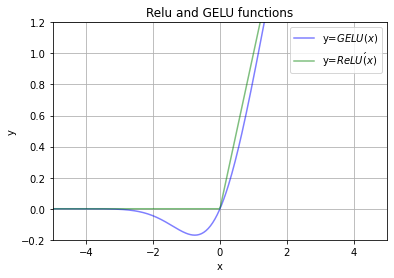

In [13]:
plotFunctions(r'Relu and GELU functions', [(r'$GELU(x)$', gelu), (r'$ReLU\'(x)$', relu)], ylim=(-0.2, 1.2))